In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')


# Load Data

In [2]:
tracks = pd.read_csv('../../data/processed/tracks_processed.csv', dtype=object)
tracks = tracks.set_index(['listens_factor'])

tracks.head()

,Unnamed: 0,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,...,track_genres_all,track_interest,track_language_code,track_listens,track_number,track_title,track_year_created,bit_rate_factor,interest_factor,track_price
listens_factor,,,,,,,,,,,,,,,,,,,,,
2,0,2,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,[21],4656,en,1293,3,Food,2008,0.7,1.0,3.49
3,1,3,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,[21],1470,en,514,4,Electric Ave,2008,0.7,0.1,0.35
2,2,5,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,[21],1933,en,1151,6,This World,2008,0.7,0.7,2.45
1,3,10,2008-11-26 1:45,2008-02-06 0:00,4,6,47632,[],Constant Hitmaker,2,...,[10],54881,en,50135,1,Freeway,2008,0.5,1.0,2.5
4,4,20,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,...,"[17, 10, 76, 103]",978,en,361,3,Spiritual Level,2008,0.7,0.1,0.35


In [3]:
#tracks = tracks.dropna()

X_columns=["interest_factor"]
tracks = tracks[X_columns]

# normalize the columns

track_norm = tracks.copy()
track_norm
for col in X_columns:
    track_norm[col] = StandardScaler().fit_transform(track_norm[col].values.reshape(-1, 1))

#print(tracks.shape)
track_norm

/home/cloudera/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,interest_factor
listens_factor,
2,1.298125
3,-1.319063
2,0.425729
1,1.298125
4,-1.319063
5,-1.319063
3,-0.155868
5,-0.737466
5,-0.737466


# Model Training

In [7]:
k = 5

kmeans = KMeans(n_clusters=k).fit(track_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

tracks_results = tracks.copy()
track_norm['cluster'] = kmeans.labels_
tracks_results['cluster'] = kmeans.labels_


{0, 1, 2, 3, 4}
Counter({1: 29028, 0: 24492, 2: 19933, 4: 16914, 3: 15532})


# Analyze the results

[('3', 11614), ('5', 6203), ('4', 3719), ('2', 2951), ('1', 5)]
[('1', 24720), ('2', 3176), ('3', 919), ('4', 169), ('5', 44)]
[('2', 12294), ('3', 3744), ('1', 2094), ('4', 1332), ('5', 469)]
[('4', 7745), ('3', 3911), ('5', 3865), ('2', 11)]
[('5', 12097), ('4', 4785), ('3', 30), ('2', 2)]
interest_factor


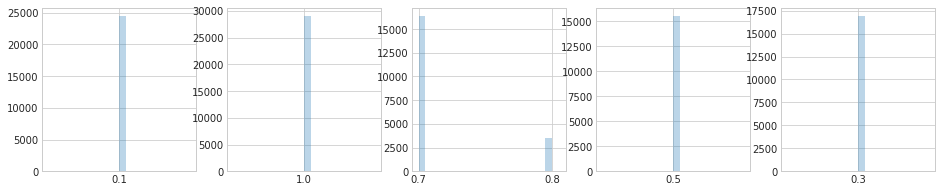

In [8]:
#nterest coefficient
# 1:  Top Chart (Interest factor > 0.09) x =1 - more than 290,000 interests
# 0.8: between 230,000 and 290,000 
# 0.7: between 165,000 and 230,000 
# 0.6: between 98,000 and 165,000 
# 0.5: between 65,000 and 98,000 
# 0.3: between 30,000 and 65,000 
# 0.2: below 30,000 would be low interest 

# categorize track_listens to five divisions
# 1:  (Track Listens >= 2000) 
# 2: between 1000 and 2000 
# 3: between 500 and 1000 
# 4: between 250 and 500 
# 5: less than 500

tracks_results = tracks_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(tracks_results[tracks_results['cluster']==cluster]['listens_factor']).most_common(5))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
        plt.hist(tracks_results[tracks_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()
